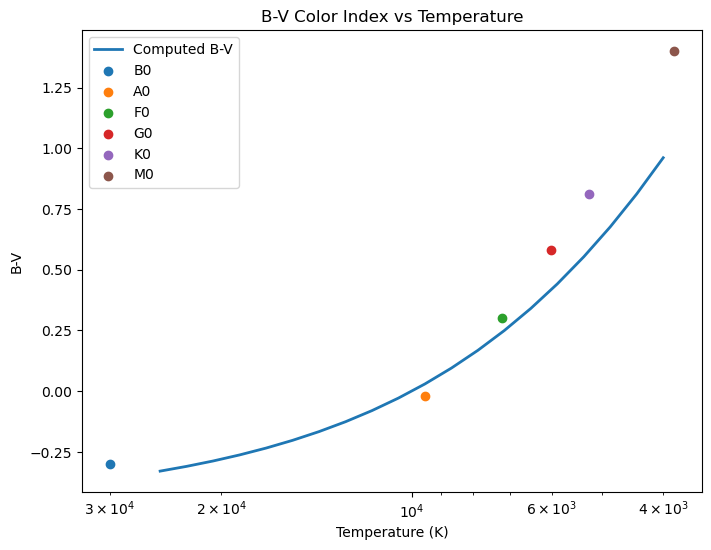

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

## For the integration, I visited the scipy library and I use the simpon function

# Consts
h = 6.626e-34  # Planck's constant (J s)
c = 3.0e8      # Speed of light (m/s)
k_B = 1.381e-23 # Boltzmann's constant (J/K)

# Filter dictonary
filters = {
    "B": {"lambda0": 445e-9, "dlambda": 90e-9},
    "V": {"lambda0": 550e-9, "dlambda": 90e-9}
}

# Planck function
def planck(wavelength, T):
    return (2.0 * h * c**2 / wavelength**5) / (np.exp(h * c / (wavelength * k_B * T)) - 1)

# Integration function
def flux_in_band(T, lambda0, dlambda, num_points=1000):
    lambdas = np.linspace(lambda0 - dlambda/2, lambda0 + dlambda/2, num_points)
    B_lambda = planck(lambdas, T)
    return simpson(y=B_lambda, x=lambdas)  # 

# Calc B-V 
T_vals = np.logspace(np.log10(4000), np.log10(25000), 20)
B_V_vals = []

for T in T_vals:
    f_B = flux_in_band(T, **filters["B"])
    f_V = flux_in_band(T, **filters["V"])
    B_V = -2.5 * np.log10(f_B / f_V)
    B_V_vals.append(B_V)

# So B-V = 0 at T = 10000 K
T_ref = 10000
f_B_ref = flux_in_band(T_ref, **filters["B"])
f_V_ref = flux_in_band(T_ref, **filters["V"])
B_V_ref = -2.5 * np.log10(f_B_ref / f_V_ref)
B_V_vals = np.array(B_V_vals) - B_V_ref

# Star Data
real_stars = {
    "B0": (30000, -0.30),
    "A0": (9520, -0.02),
    "F0": (7200, +0.30),
    "G0": (6030, +0.58),
    "K0": (5250, +0.81),
    "M0": (3850, +1.40)
}

# Plot
plt.figure(figsize=(8,6))
plt.plot(T_vals, B_V_vals, label="Computed B-V", lw=2)
for star, (T, B_V) in real_stars.items():
    plt.scatter(T, B_V, label=star, zorder=3)

plt.xscale("log")
plt.xlabel("Temperature (K)")
plt.ylabel("B-V")
plt.gca().invert_xaxis()
plt.legend()
plt.title("B-V Color Index vs Temperature")
plt.show()
